# WeatherPy Analysis

* In genreal, temperature rises as we approach the equator. Although we do see some even higher temperatures around 10-30N.

* Humidity is high around the euquator, and it reaches a low around 20N.

* Latitude does not seem to be a huge factor when it comes to cloudiness and wind speed. We can see varying levels of cloudiness and wind speed across all latitudes.

In [1]:
import numpy as np
from citipy import citipy
from config import api_key
import openweathermapy.core as owm
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

## Generate Cities List

In [2]:
# Randomly select 2000 pairs of latitude/longitude.
np.random.seed(1)
lats = np.random.uniform(-90,90,[2000])
lons = np.random.uniform(-180,180,[2000])

In [3]:
# Get a list of nearest cities.
cities_ls = [citipy.nearest_city(i,j).city_name for i,j in zip(lats, lons)]
len(cities_ls)

2000

In [4]:
# Drop duplicates.
cities = set(cities_ls)
len(cities)

773

## Perform API Calls

In [5]:
settings = {"appid": api_key, "units": "imperial"}
responses = []
n = 0
for city in cities:
    try:
        responses.append(owm.get_current(city, **settings))
    except:
        n += 1
print(f"No results for {n} cities.")

No results for 81 cities.


In [6]:
summary = ["name", "sys.country", "coord.lat", "dt", "main.temp", "main.humidity", "clouds.all", "wind.speed"]
data = [responses[_](*summary) for _ in range(len(responses))]

In [7]:
for _ in range(len(data)):
    print(f"http://api.openweathermap.org/data/2.5/weather?appid=***&units=imperial&q={data[_][0].lower().replace(' ', '+')}")
# See Bootcampspot for "appid".

http://api.openweathermap.org/data/2.5/weather?appid=***&units=imperial&q=mount+gambier
http://api.openweathermap.org/data/2.5/weather?appid=***&units=imperial&q=nikolayevsk-na-amure
http://api.openweathermap.org/data/2.5/weather?appid=***&units=imperial&q=ayorou
http://api.openweathermap.org/data/2.5/weather?appid=***&units=imperial&q=mae+sai
http://api.openweathermap.org/data/2.5/weather?appid=***&units=imperial&q=naliya
http://api.openweathermap.org/data/2.5/weather?appid=***&units=imperial&q=haines+junction
http://api.openweathermap.org/data/2.5/weather?appid=***&units=imperial&q=charlestown
http://api.openweathermap.org/data/2.5/weather?appid=***&units=imperial&q=touros
http://api.openweathermap.org/data/2.5/weather?appid=***&units=imperial&q=san+quintin
http://api.openweathermap.org/data/2.5/weather?appid=***&units=imperial&q=namwala
http://api.openweathermap.org/data/2.5/weather?appid=***&units=imperial&q=muncar
http://api.openweathermap.org/data/2.5/weather?appid=***&units=impe

In [8]:
df = pd.DataFrame(data, columns=["City", "Country", "Latitude", "Time", 
                                 "Temperature (F)", "Humidity (%)", "Cloudiness (%)", "Wind Speed (mph)"])
for _ in df.index.values:
    df.loc[_, "Time"] = datetime.fromtimestamp(df.loc[_, "Time"]).strftime('%Y-%m-%d %H:%M:%S')
df.to_csv("weather_data.csv", index=False)
df.head()

,City,Country,Latitude,Time,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Mount Gambier,AU,-37.83,2018-05-23 13:07:11,51.03,100,80,2.75
1,Nikolayevsk-na-amure,RU,53.14,2018-05-23 13:07:11,40.14,67,76,11.25
2,Ayorou,NE,14.73,2018-05-23 13:07:11,104.04,18,8,6.55
3,Mae Sai,MM,20.44,2018-05-23 12:00:00,77.00,94,0,1.63
4,Naliya,IN,23.26,2018-05-23 13:07:12,80.01,79,0,7.78


In [9]:
df.info()
# 692 = 773 - 81

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692 entries, 0 to 691
Data columns (total 8 columns):
City                692 non-null object
Country             692 non-null object
Latitude            692 non-null float64
Time                692 non-null object
Temperature (F)     692 non-null float64
Humidity (%)        692 non-null int64
Cloudiness (%)      692 non-null int64
Wind Speed (mph)    692 non-null float64
dtypes: float64(3), int64(2), object(3)
memory usage: 43.3+ KB


## City Latitude vs. Weather Plots

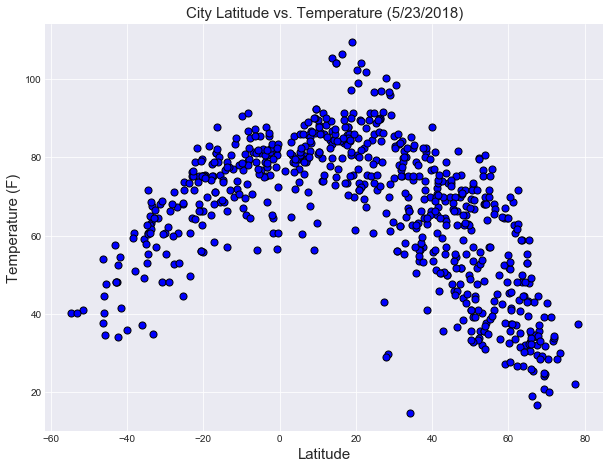

In [10]:
plt.style.use("seaborn-darkgrid")
plt.figure(figsize=(10,7.5))
plt.scatter(df["Latitude"], df["Temperature (F)"], s=50, c="b", lw=1, edgecolors="k")
plt.title("City Latitude vs. Temperature (5/23/2018)", size=15)
plt.xlabel("Latitude", size=15)
plt.ylabel("Temperature (F)", size=15)
plt.savefig("plot1")
plt.show()

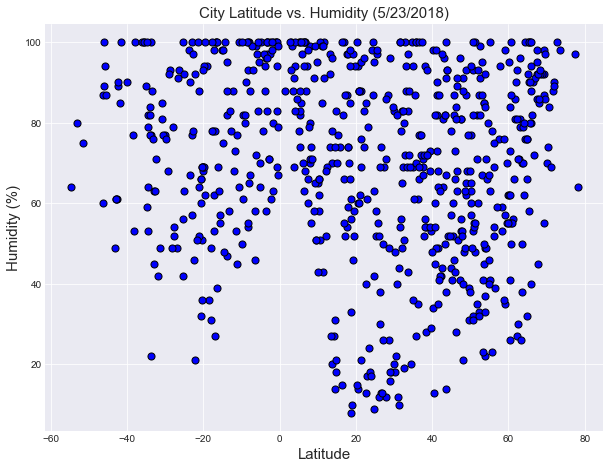

In [11]:
plt.figure(figsize=(10,7.5))
plt.scatter(df["Latitude"], df["Humidity (%)"], s=50, c="b", lw=1, edgecolors="k")
plt.title("City Latitude vs. Humidity (5/23/2018)", size=15)
plt.xlabel("Latitude", size=15)
plt.ylabel("Humidity (%)", size=15)
plt.savefig("plot2")
plt.show()

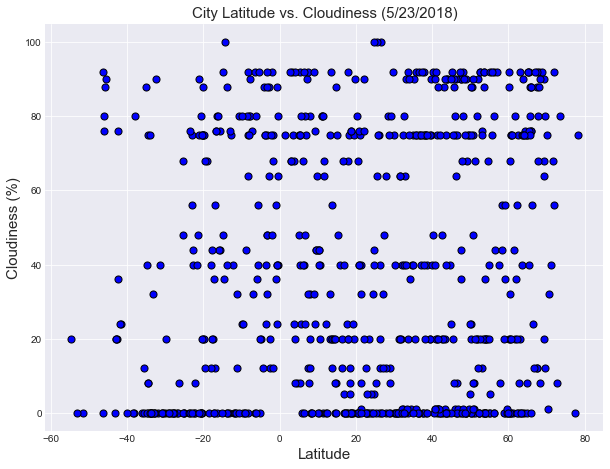

In [12]:
plt.figure(figsize=(10,7.5))
plt.scatter(df["Latitude"], df["Cloudiness (%)"], s=50, c="b", lw=1, edgecolors="k")
plt.title("City Latitude vs. Cloudiness (5/23/2018)", size=15)
plt.xlabel("Latitude", size=15)
plt.ylabel("Cloudiness (%)", size=15)
plt.savefig("plot3")
plt.show()

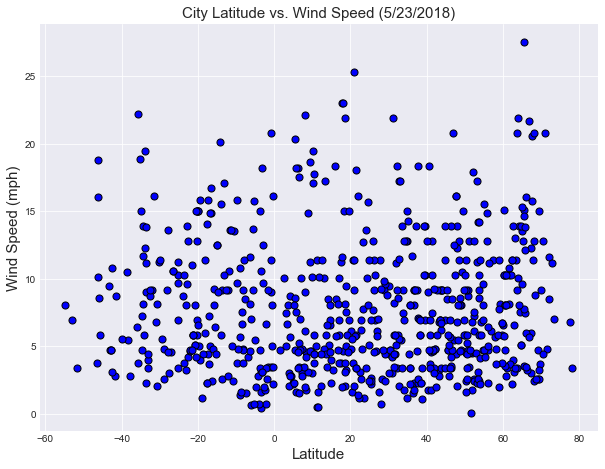

In [13]:
plt.figure(figsize=(10,7.5))
plt.scatter(df["Latitude"], df["Wind Speed (mph)"], s=50, c="b", lw=1, edgecolors="k")
plt.title("City Latitude vs. Wind Speed (5/23/2018)", size=15)
plt.xlabel("Latitude", size=15)
plt.ylabel("Wind Speed (mph)", size=15)
plt.savefig("plot4")
plt.show()